In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [408]:
from sklearn.decomposition import PCA

In [409]:
# df = pd.read_csv("C:\\Data Science\\UnsupervisedML\\retail.csv")
df = pd.read_csv("D:\\EduNet\\Course\\Module 5 - AI-ML\\Labs\\Chapter 6\\retail_sales_dataset.csv")

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [411]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [412]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [413]:
df.drop(['Transaction ID', 'Date','Customer ID'],axis='columns',inplace=True)
df

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,34,Beauty,3,50,150
1,Female,26,Clothing,2,500,1000
2,Male,50,Electronics,1,30,30
3,Male,37,Clothing,1,500,500
4,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...
995,Male,62,Clothing,1,50,50
996,Male,52,Beauty,3,30,90
997,Female,23,Beauty,4,25,100
998,Female,36,Electronics,3,50,150


In [414]:
df.replace('Male',0,inplace=True)
df.replace('Female',1,inplace=True)

C:\Users\Jash\AppData\Local\Temp\ipykernel_35868\1333810795.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('Female',1,inplace=True)


In [415]:
# enc= LabelEncoder()
# ProductEncoded = enc.fit_transform(df['Product Category'])
# ProductEncoded 

In [416]:
# df['ProductEncoded']=ProductEncoded 

In [417]:
categoryDF=pd.get_dummies(df["Product Category"])
categoryDF

,Beauty,Clothing,Electronics
0,True,False,False
1,False,True,False
2,False,False,True
3,False,True,False
4,True,False,False
...,...,...,...
995,False,True,False
996,True,False,False
997,True,False,False
998,False,False,True


In [418]:
df.drop('Product Category',axis=1,inplace=True)
df

,Gender,Age,Quantity,Price per Unit,Total Amount
0,0,34,3,50,150
1,1,26,2,500,1000
2,0,50,1,30,30
3,0,37,1,500,500
4,0,30,2,50,100
...,...,...,...,...,...
995,0,62,1,50,50
996,0,52,3,30,90
997,1,23,4,25,100
998,1,36,3,50,150


In [419]:
df = pd.concat([df,categoryDF],axis=1)
df

,Gender,Age,Quantity,Price per Unit,Total Amount,Beauty,Clothing,Electronics
0,0,34,3,50,150,True,False,False
1,1,26,2,500,1000,False,True,False
2,0,50,1,30,30,False,False,True
3,0,37,1,500,500,False,True,False
4,0,30,2,50,100,True,False,False
...,...,...,...,...,...,...,...,...
995,0,62,1,50,50,False,True,False
996,0,52,3,30,90,True,False,False
997,1,23,4,25,100,True,False,False
998,1,36,3,50,150,False,False,True


In [420]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(df)
    wcss.append(model.inertia_)
wcss    

[349415979.526,
 75932718.41357873,
 35156499.422430895,
 20474042.472200792,
 9781173.406215288,
 7623270.865869977,
 4248233.615684789,
 2879677.1894471617,
 1841865.5503552465,
 753459.51178622]

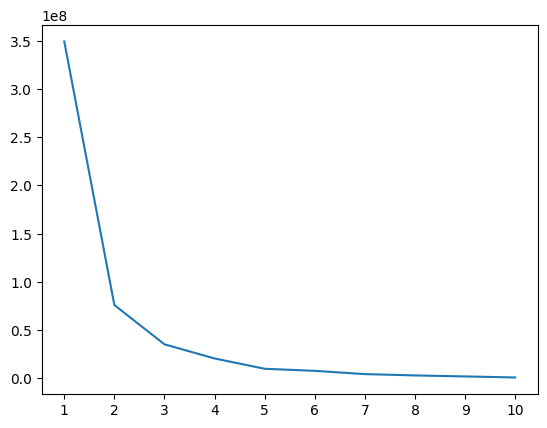

In [421]:
list = [1,2,3,4,5,6,7,8,9,10]
plt.plot(list,wcss)
plt.xticks(range(1,11))
plt.show()

In [422]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df)

KMeans(n_clusters=3, random_state=42)

In [423]:
df['Cluster']= model.predict(df)

In [424]:
df['Cluster'].unique()

array([0, 1, 2])

In [425]:
df.head()

,Gender,Age,Quantity,Price per Unit,Total Amount,Beauty,Clothing,Electronics,Cluster
0,0,34,3,50,150,True,False,False,0
1,1,26,2,500,1000,False,True,False,1
2,0,50,1,30,30,False,False,True,0
3,0,37,1,500,500,False,True,False,0
4,0,30,2,50,100,True,False,False,0


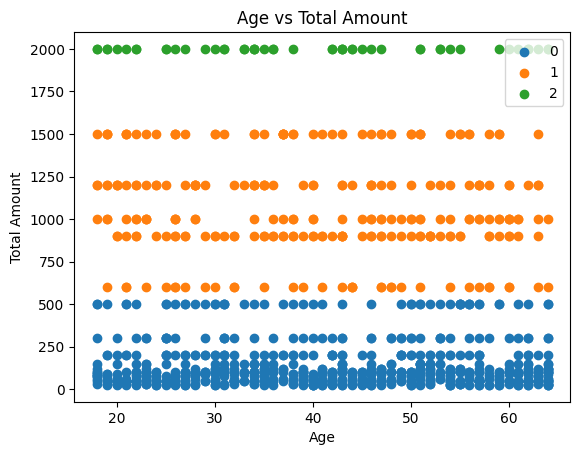

In [426]:
for i in sorted(df['Cluster'].unique()):
    filterData = df[df['Cluster'] == i]
    plt.scatter(x=filterData['Age'], y=filterData['Total Amount'], label = i)
plt.legend()
plt.title('Age vs Total Amount')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.show()